In [6]:
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from matplotlib import pyplot
from pandas import DataFrame

# loading iris dataset 
iris = datasets.load_iris()
X, y = iris.data[:, 1:3], iris.target

clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()

# Voting Classifier with hard voting 
eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)],voting='hard')

# Ensemble of Models 

for clf, label in zip([clf1, clf2, clf3, eclf], ['Logistic Regression', 'Random Forest', 'naive Bayes', 'Ensemble']):
    scores = cross_val_score(clf, X, y, scoring='accuracy', cv=5)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))
    
#estimator = [] 
#estimator.append(('LR',LogisticRegression(solver ='lbfgs',multi_class ='multinomial',max_iter = 200))) 
#estimator.append(('SVC', SVC(gamma ='auto', probability = True))) 
# estimator.append(('DTC', DecisionTreeClassifier())) 


Accuracy: 0.95 (+/- 0.04) [Logistic Regression]
Accuracy: 0.94 (+/- 0.04) [Random Forest]
Accuracy: 0.91 (+/- 0.04) [naive Bayes]
Accuracy: 0.95 (+/- 0.04) [Ensemble]


In [15]:
# More Model ensembling techniques now #
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from itertools import product


# Loading some example data

iris = datasets.load_iris()
X = iris.data[:, [0, 2]]

y = iris.target

# Training classifiers
clf1 = DecisionTreeClassifier(max_depth=4)
clf2 = KNeighborsClassifier(n_neighbors=7)
clf3 = SVC(kernel='rbf', probability=True)
eclf = VotingClassifier(estimators=[('dt', clf1), ('knn', clf2), ('svc', clf3)], voting='soft', weights=[2, 1, 2])

clf1 = clf1.fit(X, y)
clf2 = clf2.fit(X, y)
clf3 = clf3.fit(X, y)
eclf = eclf.fit(X, y)

for clf, label in zip([clf1, clf2, clf3, eclf], ['Deicision Tree', 'K-Nearest Neighbour', 'SVC', 'Ensemble']):
    scores = cross_val_score(clf, X, y, scoring='accuracy', cv=5)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))


NameError: name 'my_model' is not defined

In [17]:
# Now we want to analyse the models using tfma 
# This setup was tested with TF 2.10 and TFMA 0.41 (using colab), but it should
# also work with the latest release.
import sys
import os
from sklearn.model_selection import KFold
import numpy as np

# Confirm that we're using Python 3
assert sys.version_info.major==3, 'This notebook must be run using Python 3.'

import tensorflow as tf
# print('TF version: {}'.format(tf.__version__))
# import apache_beam as beam
#print('Beam version: {}'.format(beam.__version__))
import tensorflow_model_analysis as tfma
# print('TFMA version: {}'.format(tfma.__version__))

from tensorflow import keras

X = iris.data[:, [0, 2]]
y = iris.target

# Define a simple sequential model
def create_model():
  model = tf.keras.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(2,)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10)
  ])

  model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

  return model

# Create a basic model instance
model = create_model()

for kfold, (train, test) in enumerate(KFold(n_splits=3, 
                                shuffle=True).split(X, y)):
    # clear the session 
    tf.keras.backend.clear_session()

    # calling the model and compile it 
    #seq_model = my_model()
    model.compile(
        loss  = tf.keras.losses.CategoricalCrossentropy(),
        metrics  = tf.keras.metrics.CategoricalAccuracy(),
        optimizer = tf.keras.optimizers.Adam())

    print('Train Set')
    print(X[train].shape)
    print(y[train].shape)

    print('Test Set')
    print(X[test].shape)
    print(y[test].shape)

    # run the model 
    model.fit(X[train], y[train],
              batch_size=128, epochs=2, validation_data=(X[test], y[test]))
    
    model.save_weights(f'wg_{kfold}.h5')

# Display the model's architecture
model.summary()


# The tf.keras.callbacks.ModelCheckpoint callback allows you to continually 
# save the model both during and at the end of training

checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

# Train the model with the new callback
model.fit(X[train], 
          y[train],  
          epochs=10,
          validation_data=(X[test], y[test]),
          callbacks=[cp_callback])  # Pass callback to training

filepath = "/home/antillas/collabos/model_aggregation"

# Save all The model's configuration (architecture), The model's weights, 
# Saves a model as a .keras file - The model's optimizer's state (if any)

model.save("kera_model_one.keras")

# Saves all layer weights to a .weights.h5 file.
model.save_weights(
    filepath, overwrite=True
)

Train Set
(100, 2)
(100,)
Test Set
(50, 2)
(50,)
Epoch 1/2


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1151, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1209, in compute_loss
        return self.compiled_loss(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 277, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 143, in __call__
        losses = call_fn(y_true, y_pred)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 270, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 2221, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 5573, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 10) are incompatible


In [8]:
# Next steps for the 
'''
1: Use the metadat extractor here to retrieve any metadata about the pretrained models

2: A component for the metadata schema validator

3: Give weights to each model metadata -> Kind of a fitnesss functions

4: Encode metadata as chromosomes

5: Do generic algorithm for Model aggregation

6: Do FedAvg aggregations, Bagging/stacking/Voting

7: Compare results from 5 to results from 6
'''

'''
  FedAvg - Load pretrained models and do aggregations - mobilenet models
'''


import collections

import numpy as np
import tensorflow as tf
import tensorflow_federated as tff
from urllib.request import urlopen
from PIL import Image
import timm

!pip install tf-keras==2.15.0
!pip install tensorflow==2.15.2

def model_fn():
  # We _must_ create a new model here, and _not_ capture it from an external
  # scope. TFF will call this within different graph contexts.
  # Get pre-trained mobileNet models 
  keras_model = timm.create_model('mobilenetv4_hybrid_large.ix_e600_r384_in1k', pretrained=True, features_only=True,)
    
  # keras_model = create_keras_model()
  return tff.learning.models.from_keras_model(
      keras_model,
      loss=tf.keras.losses.SparseCategoricalCrossentropy(),
      metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])


if "__name__" == main:
    training_process = tff.learning.algorithms.build_weighted_fed_avg(
        model_fn,
        client_optimizer_fn=lambda: tf.keras.optimizers.SGD(learning_rate=0.02),
        server_optimizer_fn=lambda: tf.keras.optimizers.SGD(learning_rate=1.0))

    print(training_process.initialize.type_signature.formatted_representation())  


NameError: name 'python' is not defined

In [29]:
import pandas as pd
import numpy as np
import json

json_data = '[{"ID":10,"Name":"Pankaj","Role":"CEO"},' \
            '{"ID":20,"Name":"David Lee","Role":"Editor"}]'



from sklearn import datasets
from sklearn import ensemble
from sklearn import model_selection

from evidently import ColumnMapping
from evidently.options import ColorOptions
from evidently.report import Report

from evidently.metrics import ColumnDriftMetric
from evidently.metrics import DataDriftTable
from evidently.metrics import DatasetDriftMetric
from evidently.metrics import ColumnCategoryMetric
from evidently.metrics import ColumnDistributionMetric
from evidently.metrics import ColumnValuePlot
from evidently.metrics import ColumnQuantileMetric
from evidently.metrics import ColumnCorrelationsMetric
from evidently.metrics import ColumnValueListMetric
from evidently.metrics import ColumnValueRangeMetric

#Dataset for Data Quality and Integrity
adult_data = datasets.fetch_openml(name='adult', version=2, as_frame=True)
adult = adult_data.frame
print("\n -----> ", adult.shape)


adult_ref = adult[~adult.education.isin(['Some-college', 'HS-grad', 'Bachelors'])]
adult_cur = adult[adult.education.isin(['Some-college', 'HS-grad', 'Bachelors'])]

#print("\n =====> ", adult_ref)
#print("\n ******> ", adult_cur.shape)

adult_cur.iloc[:2000, 3:5] = np.nan

data_drift_dataset_report = Report(metrics=[
    DataDriftTable(num_stattest='kl_div', cat_stattest='psi'),    
])

data_drift_dataset_report.run(reference_data=adult_ref, current_data=adult_cur)
data_drift_dataset_report

#report in a JSON format
# data_drift_dataset_report.json()

json_object = json.loads(data_drift_dataset_report.json())

json_formatted_str = json.dumps(json_object, indent=2)

print(json_formatted_str)




 ----->  (48842, 15)
{
  "version": "0.4.37",
  "metrics": [
    {
      "metric": "DataDriftTable",
      "result": {
        "number_of_columns": 15,
        "number_of_drifted_columns": 3,
        "share_of_drifted_columns": 0.2,
        "dataset_drift": false,
        "drift_by_columns": {
          "age": {
            "column_name": "age",
            "column_type": "num",
            "stattest_name": "Kullback-Leibler divergence",
            "stattest_threshold": 0.1,
            "drift_score": 0.02723374709437682,
            "drift_detected": false,
            "current": {
              "small_distribution": {
                "x": [
                  17.0,
                  24.3,
                  31.6,
                  38.9,
                  46.2,
                  53.5,
                  60.8,
                  68.1,
                  75.4,
                  82.7,
                  90.0
                ],
                "y": [
                  0.02471021672878118,
   

SHOWING TRANSFORMED IMAGES NOW ...


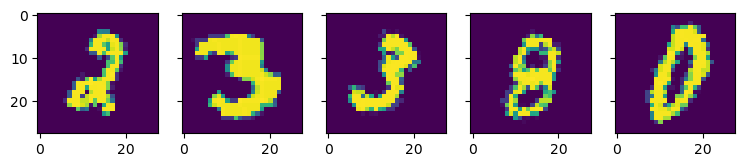

SHOWING TRANSFORMED IMAGES NOW ...


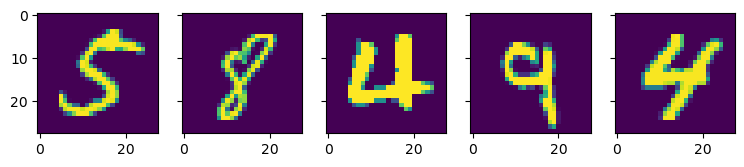

SHOWING TRANSFORMED IMAGES NOW ...


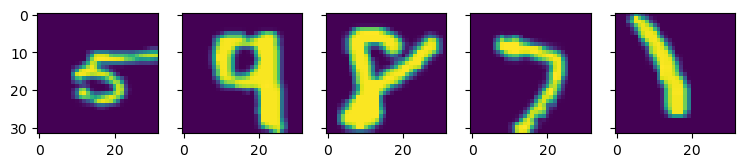

KeyError: '0'

In [37]:
# Model metadata setting up 
# And splitting dataset for drift measures

import os

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from scipy import ndimage
from scipy.stats import ks_2samp
from scipy.spatial import distance

from evidently.report import Report
from evidently.metrics import DataDriftTable
from evidently.metrics import DatasetDriftMetric
from evidently.metrics import DatasetSummaryMetric
from evidently.metrics import DatasetMissingValuesMetric
#from evidently.metrics import DatasetCorrelationMetric
# from data_drift_detector import DataDriftDetector


import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import cv2
import pandas as pd
import json
import torch
import torchvision.transforms as T
import PIL
from PIL import Image
from torch.utils.data import Dataset, DataLoader

# from scikit-image.io import imread, imshow

import random
import numpy as np

# Example metadata chromosome structure
class MetadataChromosome:
    def __init__(self, metadata):
        self.metadata = metadata
        self.fitness = 0.0

    def calculate_fitness(self):
        # Define a fitness function based on the metadata
        # For simplicity, we'll sum the metadata values
        self.fitness = sum(self.metadata.values()) 

    def mutate(self):
        # Randomly mutate one of the metadata values
        key = random.choice(list(self.metadata.keys()))
        self.metadata[key] = random.uniform(0, 1)

    def crossover(self, other):
        # Perform crossover with another chromosome
        child_metadata = {}
        for key in self.metadata.keys():
            if random.random() < 0.5:
                child_metadata[key] = self.metadata[key]
            else:
                child_metadata[key] = other.metadata[key]
        return MetadataChromosome(child_metadata)

# Initialize a population of chromosomes
def initialize_population(size, metadata_keys):
    population = []
    for _ in range(size):
        metadata = {key: random.uniform(0, 1) for key in metadata_keys}
        chromosome = MetadataChromosome(metadata)
        population.append(chromosome)
    return population

# Select parents for crossover
def select_parents(population):
    population.sort(key=lambda x: x.fitness, reverse=True)
    return population[:2]

# Genetic Algorithm
def genetic_algorithm(metadata_keys, generations=100, population_size=10):
    population = initialize_population(population_size, metadata_keys)

    for generation in range(generations):
        # Calculate fitness for each chromosome
        for chromosome in population:
            chromosome.calculate_fitness()

        # Select parents
        parents = select_parents(population)

        # Create next generation
        new_population = []
        for _ in range(population_size // 2):
            parent1, parent2 = random.sample(parents, 2)
            child1 = parent1.crossover(parent2)
            child2 = parent2.crossover(parent1)
            child1.mutate()
            child2.mutate()
            new_population.extend([child1, child2])

        population = new_population

        # Print the best fitness of the current generation
        best_fitness = max(chromosome.fitness for chromosome in population)
        print(f"Generation {generation + 1}: Best Fitness = {best_fitness}")

    # Return the best chromosome
    best_chromosome = max(population, key=lambda x: x.fitness)
    return best_chromosome


def calculate_psi(expected, actual, buckettype='bins', buckets=10, axis=0):

    def psi(expected_array, actual_array, buckets):
        def scale_range (input, min, max):
            input += -(np.min(input))
            input /= np.max(input) / (max - min)
            input += min
            return input

        breakpoints = np.arange(0, buckets + 1) / (buckets) * 100
        breakpoints = scale_range(breakpoints, np.min(expected_array), np.max(expected_array))
        expected_percents = np.histogram(expected_array, breakpoints)[0] / len(expected_array)
        actual_percents = np.histogram(actual_array, breakpoints)[0] / len(actual_array)
        def sub_psi(e_perc, a_perc):
            if a_perc == 0:
                a_perc = 0.0001
            if e_perc == 0:
                e_perc = 0.0001

 

            value = (e_perc - a_perc) * np.log(e_perc / a_perc)
            return(value)

 

        psi_value = np.sum(sub_psi(expected_percents[i], actual_percents[i])

                                             for i in range(0, len(expected_percents)))

        return(psi_value)

    if len(expected.shape) == 1:
        psi_values = np.empty(len(expected.shape))
    else:
        psi_values = np.empty(expected.shape[axis])

    for i in range(0, len(psi_values)):
        psi_values = psi(expected, actual, buckets)

    return(psi_values)


# Trying a different PSI procedure
def psi(reference, monitored, bins=None):
    """
    Calculate the Population Stability Index (PSI) between a reference dataset and a monitored dataset.
    
    Parameters:
    reference (numpy.array): The reference dataset, representing the baseline distribution.
    monitored (numpy.array): The monitored dataset, representing the distribution to compare against the reference.
    bins (int, optional): The number of bins to use for the histograms. If set to None, Doane's formula will be used to calculate the number of bins. Default is None.
    
    Returns:
    float: The calculated PSI value. A higher value indicates greater divergence between the two distributions.
    """
    # Get the full dataset
    full_dataset = np.concatenate((reference, monitored))

    # If bins is not parametrized, use Doane's formula for calculating number of bins
    if bins is None:
        _, bin_edges = np.histogram(full_dataset, bins="doane")
    else:  # If number of bins is specified
        bin_edges = np.linspace(min(min(reference), min(monitored)), max(max(reference), max(monitored)), bins + 1)

    # Calculate the histogram for each dataset
    reference_hist, _ = np.histogram(reference, bins=bin_edges)
    monitored_hist, _ = np.histogram(monitored, bins=bin_edges)

    # Convert histograms to proportions
    reference_proportions = reference_hist / np.sum(reference_hist)
    monitored_proportions = monitored_hist / np.sum(monitored_hist)

    # Replace zeroes to avoid division by zero or log of zero errors
    monitored_proportions = np.where(monitored_proportions == 0, 1e-6, monitored_proportions)
    reference_proportions = np.where(reference_proportions == 0, 1e-6, reference_proportions)

    # Calculate PSI
    psi_values = (monitored_proportions - reference_proportions) * np.log(monitored_proportions / reference_proportions)
    psi = np.sum(psi_values)

    print("************* ", psi)

    return psi

## Calculate psi for features
psi_list = []

# top_feature_list=df_salary_high.columns
'''
for feature in range(len(train_images[0])): #top_feature_list:
        # Assuming you have a validation and training set
        #psi_t = calculate_psi( dataset_ver1[0][feature], train_images[0][feature])
        # psi_t = psi( dataset_ver1[feature], train_images[feature])
        psi_list.append(psi_t)      
        print('Stability index for column ',feature,'is',psi_t)
'''

def dataset_ver_one (image):
    return ndimage.prewitt(image, axis=0)
    #return ds.filter(lambda x: x < 5)

def dataset_ver_two (image):
    return ndimage.prewitt(image, axis=1)
    #return ds.filter(lambda x: x < 5)

def dataset_ver_three (prewitt_h, prewitt_v):
    magnitude = np.sqrt(prewitt_h ** 2 + prewitt_v ** 2)
    magnitude *= 255 / np.max(magnitude)
    return magnitude
    # dimage.prewitt(ds[0], axis=1)
    # return ds.filter(lambda x: x < 5)
    
def generate_dataset_from_mnist(train_images, train_labels):
    new_dataset = train_images.apply(dataset_fn)
    list(dataset.as_numpy_iterator())

    
mnist = tf.keras.datasets.mnist
#(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
(train_images, train_labels),(test_images, test_labels) = mnist.load_data()

train_labels = train_labels[:1000]
test_labels = test_labels[:1000]

train_images = train_images[:1000].reshape(-1, 28 * 28) / 255.0
test_images = test_images[:1000].reshape(-1, 28 * 28) / 255.0

# edges_prewitt_vertical = prewitt_v(train_images[0])
dataset_ver1 = []
dataset_ver2 = []
dataset_ver3 = []
dataset_ver4 = []
dataset_transposed_ver = []
dataset_corrupted_ver = []
    

def transpose_image(img):
    kernel = np.zeros((28,28),np.uint8)
    blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel)

    return blackhat
    
    #imgT = img.T
    # print("\n Shape: ", imgT.shape)
    #return imgT


def corrupted_image(img):
    
    kernel = np.zeros((28,28),np.uint8)
    tophat = cv2.morphologyEx(img, cv2. MORPH_TOPHAT, kernel) #

    return tophat
    

def add_gaussian_noise(img):
    gauss_noise=np.ones((28,28),dtype=np.uint8)
    # We then use a random distribution to determine the pixel values 
    # of the noise (in this case with a mean of 128 and a sigma of 20)
    cv2.randn(gauss_noise,18,2)
    gauss_noise=(gauss_noise*10.5).astype(np.uint8)
    gn_img=cv2.add(img,gauss_noise)
    # print("\n **************** ", gn_img)

    return gn_img


#for t in range(len(train_images)):
#    prewitt_h = dataset_ver_one(train_images[t]) #, axis=0)
#    #prewitt_v = dataset_ver_two(train_images[t]) #, axis=1)    
#    prewitt_v = image_flip(train_images[t])
#    magnitude = dataset_ver_three(prewitt_h, prewitt_v)
#    gaussian = add_gaussian_noise(train_images[t])
#    transposedImg = transpose_image(train_images[t])
#    corrputedImg = corrupted_image(train_images[t])
    
#    dataset_ver1.append(prewitt_h)
#    dataset_ver2.append(prewitt_v)
#    dataset_ver3.append(magnitude)
#    dataset_ver4.append(gaussian)
#    dataset_transposed_ver.append(transposedImg)
#    dataset_corrupted_ver.append(corrputedImg)


# print("\n TYPES: => ", len(dataset_ver1), len(train_images))

def write_new_dsets_to_file(dataset, dataset_name):
    #import csv
    
    my_df = pd.DataFrame(dataset)
    my_df.to_csv(dataset_name+'.csv', index=False, header=False)

#write_new_dsets_to_file(dataset_ver1, "hpre_dset_1.csv")
#write_new_dsets_to_file(dataset_ver2, "vpre_dset_2.csv")
#write_new_dsets_to_file(dataset_ver3, "magnitude_dset_3.csv")
#write_new_dsets_to_file(dataset_ver4, "gaussian_dset_4.csv")
#write_new_dsets_to_file(dataset_transposed_ver, "transposed_dset_5.csv")
#write_new_dsets_to_file(dataset_corrupted_ver, "corrupted_dset_6.csv")


def _in_case_in_need_to_see_images():
    fig, axes = plt.subplots(2, 2, figsize = (8, 8))

    axes[0, 0].imshow(train_images[3000])
    # axes[0, 1].imshow(dataset_ver1[3000])
    # axes[0, 1].imshow(dataset_ver2[3000])
    axes[0, 1].imshow(dataset_corrupted_ver[3000])
    axes[1, 0].imshow(dataset_ver4[3000])
    axes[1, 1].imshow(dataset_transposed_ver[3000])
    for i, ax in enumerate(axes.ravel()):
        ax.set_title(titles[i])
        ax.axis("off")


titles = ["original dataset", "dataset_ver2", "dataset_ver3", "dataset_ver4", "dataset_transposed","dataset_corrupted"]


def image_blur():
    custom_transform = T.Compose([T.ColorJitter(brightness=(0.75, 1.25),), T.ToTensor(),])
    
    # Note transforms.ToTensor() scales input images
    # to 0-1 range
    train_dataset = torchvision.datasets.MNIST(root='data', train=True, transform=custom_transform, download=False)
    train_loader = DataLoader(dataset=train_dataset, batch_size=1000, num_workers=1, shuffle=True)
    # torch.manual_seed(RANDOM_SEED)
    
    for images, labels in train_loader:  
        images2 = images
        break

    return images2


def image_crop():
    custom_transform = T.Compose([T.Resize((38, 38)), T.RandomCrop((32, 32)), T.ToTensor(),])
    train_dataset = torchvision.datasets.MNIST(root='data', train=True, transform=custom_transform, download=True)
    train_loader = DataLoader(dataset=train_dataset, batch_size=1000, num_workers=1, shuffle=True)

    # torch.manual_seed(RANDOM_SEED)
    for images, labels in train_loader:  
        images2 = images
        break

    return images2


def image_flip():
    custom_transform = transforms.Compose([ T.RandomHorizontalFlip(p=0.5), T.ToTensor()])

    # Note transforms.ToTensor() scales input images
    # to 0-1 range
    train_dataset = torchvision.datasets.MNIST(root='data', train=True, transform=custom_transform, download=False)
    train_loader = DataLoader(dataset=train_dataset, batch_size=1000, num_workers=1, shuffle=True)

    # torch.manual_seed(RANDOM_SEED)
    for images, labels in train_loader:  
        images2 = images
        break

    return images2


def image_rotate():
    
    custom_transform = T.Compose([
    T.RandomRotation(degrees=45), T.ToTensor()]) #  resample=PIL.Image.BILINEAR)

    # Note transforms.ToTensor() scales input images
    # to 0-1 range
    train_dataset = torchvision.datasets.MNIST(root='data', train=True, transform=custom_transform, download=True)
    train_loader = DataLoader(dataset=train_dataset, batch_size=1000, num_workers=1, shuffle=True)
    # torch.manual_seed(RANDOM_SEED)
    
    for images, labels in train_loader:  
        images2 = images
        break

    return images2

    
def show_transformed_images(images2):
    print("SHOWING TRANSFORMED IMAGES NOW ...")
    fig, axs = plt.subplots(1, 5, figsize=(9, 3), sharey=True)
    for i in range(5):
        axs[i].imshow(np.transpose(images2[i], (1, 2, 0)))
    
    plt.show()
    
dataset_ver1 = image_rotate()
#dataset_ver1 = dataset_ver1[:1000].reshape(-1, 28 * 28) / 255.0

dataset_ver2 = image_blur()
#dataset_ver2 = dataset_ver2[:1000].reshape(-1, 28 * 28) / 255.0

dataset_ver3 = image_crop()
#dataset_ver3 = dataset_ver3[:1000].reshape(-1, 28 * 28) / 255.0

show_transformed_images(dataset_ver1)
show_transformed_images(dataset_ver2)
show_transformed_images(dataset_ver3)


def dataset_identifiers(titles):
    dataset_idents = {}
    
    dataset_idents.update({
                        titles[0]: dataset_ver1,
                        titles[1]: dataset_ver2,
                        titles[2]: dataset_ver3,
                        titles[3]: dataset_ver4,
                        titles[4]: dataset_transposed_ver,
                        titles[1]: dataset_corrupted_ver,
                      })

    return dataset_idents


def get_dataset_drift_evidently(base_df, current_df):

    data_drift_dataset_report = Report(metrics=[ DatasetDriftMetric(), DataDriftTable(),])
    data_drift_dataset_report.run(reference_data=base_df, current_data=current_df)
    data_drift_dataset_report.save_html("dataset_drift_report.html")

    print_drift("dataset_drift_report.html")

    drift_score = data_drift_dataset_report.as_dict()["metrics"][0]["result"]["drift_score"]
    
    if drift_score > 0.5:
        # Code to send an alert, e.g., via email or messaging
        print("ALERT: Data drift detected!")


def print_drift(filename):
     with open(filename, 'r') as file:
        data = json.load(file)

     
def get_report(reference_data, current_data):
    data_drift_dataset_report = Report(metrics=[DatasetMissingValuesMetric(), ])

    data_drift_dataset_report.run(reference_data=reference_data, current_data=current_data,  column_mapping=None) #
    data_drift_dataset_report.save("current_dataset_report.json")

    print_metric("dataset_drift_report.json")

    
def print_metric(filename):

    # get_report(reference_data, current_data)
    # Load the JSON report
    with open(filename, 'r') as file:
        data = json.load(file)

    # Accessing accuracy from the JSON report
    num_missing_values = None
    row_is_missing = False
    col_is_missing = False
    found_missing_entries = False
    
    metric_results = data['suite']['metric_results']
    
    for result in metric_results:                        
        if 'current' in result:
            tot_num_of_row = result['current'].get('number_of_rows')
            tot_num_of_col = result['current'].get('number_of_columns')
            
            num_missing_values = result['current'].get('number_of_rows_with_missing_values') # .get('accuracy')
            if num_missing_values > 0:
                row_is_missing = True
                perc_row = float(num_missing_values /tot_num_of_row)*100
                print("\n The following statistics about missing entries:: ", perc_row)
                row_is_missing = True
            else:
                row_is_missing = False
                #print("\n No rows were found with missing values")

            col_num_missing_values = result['current'].get('number_of_columns_with_missing_values') # .get('accuracy')            
            if col_num_missing_values > 0:
                col_is_missing = True
                perc_col = float(col_num_missing_values/tot_num_of_col)*100
                #print("\n The following statistics about missing entries:: ", perc_col)
            else:
                col_is_missing = False
                #print("\n No columns were found with missing values")

    if row_is_missing or col_is_missing:
        found_missing_entries = True

    return found_missing_entries
    
    
def get_drift_in_dataset(base_df,current_df)->bool: 
    status = True
    report={}
    threshold=0.05

    print("\n ********* ",len(base_df), len(current_df))
    for column in range(len( base_df)): #.columns:
        d1 = base_df[column]
        d2 = current_df[column]
        is_same_dist = ks_2samp(d1,d2)

        if threshold<=is_same_dist.pvalue:
            is_found=False
        else:
            status = False
            is_found=True
    
    # print("p_value: ",float(is_same_dist.pvalue),"drift_status: ",is_found) 
    #print("p_value: %2.25f --- drift_status: %s" %(is_same_dist.pvalue,is_found)) #" ", float(is_same_dist.pvalue)
    return [is_same_dist.pvalue, is_found] #report


##train_labels = train_labels[:1000]
##test_labels = test_labels[:1000]

##train_images = train_images[:1000].reshape(-1, 28 * 28) # / 255.0
##test_images = test_images[:1000].reshape(-1, 28 * 28)

#dataset_corrupted_ver = dataset_corrupted_ver.reshape(-1, 28 * 28)

#print("\n ***************** ", train_images[0], train_images[0].shape)
#print("\n Difference: ", dataset_corrupted_ver[0], dataset_corrupted_ver[0].shape)

def get_dataset_drift(dataset):
    count = 0                    
    for t in range(len(train_images)):
        base_df =  pd.DataFrame(train_images[t]) # pd.DataFrame(t) #
        current_df =  pd.DataFrame(dataset[t]) # pd.DataFrame(t) #
        observed_drift = get_drift_in_dataset(base_df, current_df)  
        get_report(base_df, current_df)
        if observed_drift:
            count = count + 1

    return count/len(train_images)
    

trimmed_train_dataset_ver1 = dataset_ver1[:1000]
trimmed_train_dataset_ver1 = trimmed_train_dataset_ver1[:1000].reshape(-1, 28 * 28) / 255.0

trimmed_train_dataset_ver2 = dataset_ver2[:1000]
trimmed_train_dataset_ver3 = dataset_ver3[:1000]
trimmed_train_dataset_ver4 = dataset_ver4[:1000]
trimmed_train_dataset_transposed_ver = dataset_transposed_ver[:1000]
trimmed_train_dataset_corrupted_ver = dataset_corrupted_ver[:1000]

# print("\n SHAPES => ", train_images.shape, trimmed_train_dataset_ver1.shape)
get_dataset_drift_evidently(pd.DataFrame(train_images), pd.DataFrame(trimmed_train_dataset_ver1))


def generate_dataset_with_attributes(dataset, datasetID):
    import datetime, time
    ts = time.time()
    dataset_timestamp = datetime.datetime.fromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S')
    dataset_attr = {}
    # datasetID = titles.get(dataset)
    version = datasetID+"_"+dataset_timestamp
    
    empties_found = print_metric()    
    publisher = "DFKI"
    #checksum = get_dataset_checksum(dataset)
    # percent_drift_dataset = get_dataset_drift(dataset)
    # drift_dataset = get_drift_in_dataset( train_images, dataset)    
    drift_dataset = get_dataset_drift_evidently( train_images, dataset)
    std_var_stats = get_dataset_stats(dataset)
    attr = [datasetID, dataset_timestamp, publisher, empties_found, drift_dataset] # checksum, percent_drift_dataset
    
    dataset_attr.update({version:attr})
    
    return dataset_attr


'''    
    We use the gini index to measure the spasrity in the weights
    Sparsity: if weight norm ("average") is low, the model is sparse. May or may not be beneficial.
'''

def get_weight_sparsity(model, w=None):
    # The rest of the code requires numpy arrays.
    input_layer, hidden_layer, output_layer = get_model_internals(model)
    all_layer = [input_layer,hidden_layer,output_layer]
    sparse_measure = 0.0
    t = []

    for layer in all_layers:
        x = np.asarray(layer)
        if w is not None:
            w = np.asarray(w)
            sorted_indices = np.argsort(x)
            sorted_x = x[sorted_indices]
            sorted_w = w[sorted_indices]
            # Force float dtype to avoid overflows
            cumw = np.cumsum(sorted_w, dtype=float)
            cumxw = np.cumsum(sorted_x * sorted_w, dtype=float)
            return (np.sum(cumxw[1:] * cumw[:-1] - cumxw[:-1] * cumw[1:]) / 
                (cumxw[-1] * cumw[-1]))
        else:
            sorted_x = np.sort(x)
            n = len(x)
            cumx = np.cumsum(sorted_x, dtype=float)
            # The above formula, with all weights equal to 1 simplifies to:
            #return (n + 1 - 2 * np.sum(cumx) / cumx[-1]) / n
            t[layers] = (n + 1 - 2 * np.sum(cumx) / cumx[-1]) / n

    return float(np.sum(t)/len(all_layers))
    

def get_dataset_checksum(dataset_file):
    import hashlib
    checksum = hashlib.md5(open(dataset_file,'rb').read()).hexdigest()

    return checksum
    
    
def get_model_weights_analysis(model):
    '''
        1.  get weight stability by avergaing over the weights across different layers
            This will give some kind of variance, std-dev, decay rate parameter
            the distribution of this weight decay is then an exponential distrobution
            The rate parameter of this distribution is then the measure of the sparsity of the weights
        2. Then we need another measure for the health of the weights
        3. And another measure for the weight sparsity - 3 and 2 carry less weight than 1 in the fitness algorithm

        This procedure returns these as coefficients 
    '''

    num_trainable_params = np.sum([np.prod(v.shape) for v in model.trainable_variables])

    nonzero_threshold = 60
    health_status = False
    total_parameters = 0
    
    for variable in tf.trainable_variables():
        # shape is an array of tf.Dimension
        shape = variable.get_shape()
        print(shape)
        print(len(shape))
        variable_parameters = 1
        for dim in shape:
            print(dim)
            variable_parameters *= dim.value
        print(variable_parameters)
        total_parameters += variable_parameters
    print(total_parameters)

    nonzero_parameters = np.sum([np.count_nonzero(var) for var in total_parameters])

    percent_nonzeros = float(nonzero_parameters/total_parameters) * 100
    
    health_status = True if percent_nonzeros > nonzero_threshold else False

    return health_status
    

def get_layers_in_NN(model):

    conv_layers = [layer for layer in model.layers if isinstance(layer, tf.keras.layers.Conv2D)]

    return model.layers
    

def get_dataset_stats(dataset):
    #print("Shape: ", nparray.shape)
    #print("Mean: ", np.mean(nparray))
    #print("Standard Deviation: ", np.std(nparray))
    #print("Variance: ", np.var(nparray))
    #print("Min: ", np.min(nparray))
    #print("Max: ", np.max(nparray))

    return [np.std(dataset), np.var(dataset)]


def plot_histo(nparray, model_name, layer, param):
    assert param in {'weights', 'biases'}
    plt.figure(figsize=(8, 6))
    plt.hist(np.asarray(nparray).flatten(), rwidth=0.9)
    plt.title(f"Plot of {model_name} {param} in {layer} layer")
    plt.xlabel("Value")
    plt.ylabel("Count")


def summarize(nparray, model_name=None, layer=None, param=None):
    print_stats(nparray)
    plot_histo(nparray, model_name, layer, param)


def get_weight_sums(conv_layers):
    weight_sums = []
    for conv_layer in conv_layers:
        weights = conv_layer.get_weights()[0]
        weight_sums.append(sum(sum(sum(sum(abs(weights / weights.size))))))
    return weight_sums


def plot_layer_mean_weight(weight_sums, model):
    plt.figure(figsize=(8,8))
    plt.scatter(range(len(weight_sums)), weight_sums)
    plt.title(f"Weight changing by layer in {model}")
    plt.ylabel("Mean of absolute value of weight")
    plt.xlabel("Convolutional layer number")


def get_decaying_rate(weight_sums):

    decay_rate = 0.0
    summed = 0.0
    
    for weigh in weight_sums:
        summed = summed + float(1/weigh)

    decay_rate = summed/len(weight_sums)

    return decay_rate


def get_model_internals(model):
    
    W = [], U = [], b = []
    
    for layer in model.layers:
        W.append(model.layers[layer].get_weights()[0])
        U.append(model.layers[layer].get_weights()[1])
        b.append(model.layers[layer].get_weights()[2])

    return W, U, b


def generate_model_with_attributes(model):
    import tf2onnx
    import onnx

    input_signature = [tf.TensorSpec([3, 3], tf.float32, name='x')]
    # Use from_function for tf functions
    
    onnx_model, _ = tf2onnx.convert.from_keras(model, input_signature, opset=13)    
    model_owner = "DFKI"

    weight_profile = {'health': get_model_weights_analysis(model), 'sparsity': get_weight_sparsity(model), 'stability': get_decaying_rate(weight_sums)}
    dataset_profile = generate_dataset_with_attributes()

    attr1 = onnx_model.metadata_props.add()
    attr1.key = 'weight_stats'
    attr1.value = json.dumps(weight_profile)

    # we take the domain to be the class of the actual task at hand
    attr2 = onnx_model.metadata_props.add()
    attr2.key = 'domain'
    attr2.value = json.dumps("ml.task.image-classification")

    attr3 = onnx_model.metadata_props.add()
    attr3.key = 'model_version'
    attr3.value = json.dumps(model_ver)

    attr4 = onnx_model.metadata_props.add()
    attr4.key = 'producer_name'
    attr4.value = json.dumps(model_owner)

    attr5 = onnx_model.metadata_props.add()
    attr5.key = 'dataset_properties'
    attr5.value = json.dumps(dataset_profile)

    onnx.save(onnx_model.onnx, 'deeplabv3_landcover_4c.onnx')

    return onnx_model

    #print("doc_string={}".format(model.doc_string))
    #print("domain={}".format(model.domain))
    #print("ir_version={}".format(model.ir_version))
    #print("metadata_props={}".format(model.metadata_props))
    #print("model_version={}".format(model.model_version))
    #print("producer_name={}".format(model.producer_name))

    # model_attributes = {}


'''
    Now we try to train the models
'''

from sklearn.model_selection import KFold
# import apache_beam as beam
# import tensorflow_model_analysis as tfma

from tensorflow import keras

# Define a simple sequential model
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10)
    ])
    
    #model.compile(
    #    optimizer=tf.keras.optimizers.Adam(0.001),
    #    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    #    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
    #)

    return model


from typing import List, Tuple, Union


def shape(ndarray: Union[List, float]) -> Tuple[int, ...]:
    if isinstance(ndarray, list):
        # More dimensions, so make a recursive call
        outermost_size = len(ndarray)
        row_shape = shape(ndarray[0])
        return (outermost_size, *row_shape)
    else:
        # No more dimensions, so we're done
        return ()
        

def train_model(dataset):
# Create a basic model instance
    model = create_model()

    # clear the session 
    tf.keras.backend.clear_session()

    # calling the model and compile it 
    model.compile(
        loss  = tf.keras.losses.CategoricalCrossentropy(),
        metrics  = ['mae', 'acc', 'mape'], #tf.keras.metrics.CategoricalAccuracy(),
        optimizer = tf.keras.optimizers.Adam(0.001))

    # Train the model 
    model.fit(dataset, train_labels, epochs=20)
    loss, acc = model.evaluate(test_images, test_labels, verbose=2)
    print('Restored model, accuracy: loss: {:5.2f}{1.7f}%'.format(100 * acc, loss))
    
    return model


def persist_model_to_disk(model, model_name):
    # Display the model's architecture
    print("\n ****************** Model Arch *************************** \n")
    model.summary()
    # model.save_weights(f'wg_{kfold}.h5')

    filepath = "/home/antillas/collabos/model_aggregation"
    # Save all The model's configuration (architecture), The model's weights, 
    # Saves a model as a .keras file - The model's optimizer's state (if any)

    model.save("kera_model_one.keras")

    # Saves all layer weights to a .weights.h5 file.
    model.save_weights(f'wg_{kfold}.h5',
        filepath, overwrite=True
    )

# Now create the model with the respective dataset attributes
dataset_attr_1 = generate_dataset_with_attributes(trimmed_train_dataset_ver1, "dataset_ver1") # dataset_ver1
dataset_attr_2 = generate_dataset_with_attributes(trimmed_train_dataset_ver2, "dataset_ver2")
dataset_attr_3 = generate_dataset_with_attributes(trimmed_train_dataset_ver3, "dataset_ver3")
dataset_attr_4 = generate_dataset_with_attributes(trimmed_train_dataset_ver4, "dataset_ver4")
dataset_attr_5 = generate_dataset_with_attributes(trimmed_train_dataset_transposed_ver, "dataset_ver5")
dataset_attr_6 = generate_dataset_with_attributes(trimmed_train_dataset_corrupted_ver, "dataset_ver6")

trained_model_ver_1 = train_model(trimmed_train_dataset_ver1) # trimmed_train_
onyxmodel_ver_1 = generate_model_with_attributes(trained_model_ver_1, dataset_attr_1)

trained_model_ver_2 = train_model(trimmed_train_dataset_ver2)
onyxmodel_ver_2 = generate_model_with_attributes(trained_model_ver_2, dataset_attr_2)

trained_model_ver_3 = train_model(trimmed_train_dataset_ver3)
onyxmodel_ver_3 = generate_model_with_attributes(trained_model_ver_3, dataset_attr_3)

trained_model_ver_4 = train_model(trimmed_train_dataset_ver4)
onyxmodel_ver_4 = generate_model_with_attributes(trained_model_ver_4, dataset_attr_4)

trained_model_ver_5 = train_model(trimmed_train_dataset_transposed_ver)
onyxmodel_ver_5 = generate_model_with_attributes(trained_model_ver_5, dataset_attr_5)

trained_model_ver_6 = train_model(trimmed_train_dataset_corrupted_ver)
onyxmodel_ver_6 = generate_model_with_attributes(trained_model_ver_6, dataset_attr_6)

#persist_model_to_disk(model, dataset_attr.get("dataset_ver1"))

# Step 3:

# Step 4:

# Step 5:
# metadata_keys = get_model_metadata(onyxmodel) 
metadata_keys = np.concatenate(onyxmodel_ver_1.metadata_props, onyxmodel_ver_2.metadata_props, onyxmodel_ver_3.metadata_props, 
                              onyxmodel_ver_4.metadata_props, onyxmodel_ver_5.metadata_props, onyxmodel_ver_6.metadata_props)

best_chromosome = genetic_algorithm(metadata_keys)
print("Best Chromosome:", best_chromosome.metadata)


'''
  FedAvg - Load pretrained models and do aggregations 
'''

import torch.nn as nn
import torch.nn.functional as F

from util import view_10
from data import fetch_dataset, data_to_tensor, iid_partition_loader, noniid_partition_loader

# set random seeds
np.random.seed(0)
torch.manual_seed(0)
random.seed(0)

# set device
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print("| using device:", device)

# hyperparams
bsz = 10


# conv_layers = get_layers_in_NN(model)
# weight_sums = get_weight_sums(conv_layers)
# decaying_rate = get_decaying_rate(weight_sums)
# print("\n Decaying rate: ", decaying_rate)

# plot_layer_mean_weight(weight_sums, 'VGG-16')

# What we want to accomplish
# Next steps for the 
'''
1: Use the metadata extractor here to retrieve any metadata about the pretrained models

2: A component for the metadata schema validator

3: Give weights to each model metadata -> Kind of a fitnesss functions

4: Encode metadata as chromosomes

5: Do generic algorithm for Model aggregation

6: Do FedAvg aggregations

7: Evaluate the model from FedAvg against the Genetic model(metrics like acc, mape, etc) given different runs under fitness functions adjustments
'''


